<a href="https://colab.research.google.com/github/PoonamPatwardhan/DemoML/blob/master/FlowersClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from random import shuffle
from sklearn.model_selection import train_test_split

In [3]:
!wget http://download.tensorflow.org/example_images/flower_photos.tgz 

--2019-10-24 03:05:33--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz.1’

flower_photos.tgz.1 100%[===================>] 218.21M  61.3MB/s    in 3.6s    

2019-10-24 03:05:37 (61.3 MB/s) - ‘flower_photos.tgz.1’ saved [228813984/228813984]



In [0]:
!tar xzf flower_photos.tgz

In [0]:
CATEGORIES = ["daisy","dandelion","roses","sunflowers","tulips"]

In [0]:
FLOWERS_DATASET = "./flower_photos"

In [0]:
#!ls daisy/ -1 | wc -l
#!wc -1

In [9]:
training_data= []
testing_data = []
IMG_SIZE = 100

print(len(CATEGORIES))
def create_training_and_testing_data(image_count,label_count):
  for category in CATEGORIES:
       image_count = 0
       path = os.path.join(FLOWERS_DATASET, category)
       print(path)
       num_of_images = len(next(os.walk(path))[2])
       print(num_of_images)
       label = CATEGORIES.index(category)  
      
       for img in os.listdir(path):
          if image_count <= (0.8)*float(num_of_images):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, label])
            image_count = image_count + 1
          else:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            testing_data.append([new_array, label])
            image_count = image_count + 1     
       label_count=label_count+1         
  shuffle(training_data)
  shuffle(testing_data)
  
create_training_and_testing_data(0,0)

5
./flower_photos/daisy
633
./flower_photos/dandelion
898
./flower_photos/roses
641
./flower_photos/sunflowers
699
./flower_photos/tulips
799


In [10]:
len(training_data)

2939

In [11]:
len(testing_data)

731

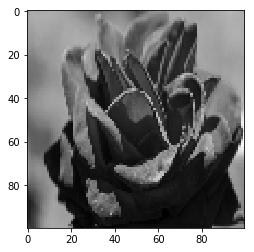

In [12]:
plt.imshow(training_data[200][0], cmap = "gray")
plt.show()

In [13]:
from keras.utils import to_categorical

X_train = []
y_train = []
X_test = []
y_test = []

for features, labels in training_data:
    X_train.append(features)
    y_train.append(labels)
  
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)
y_train = to_categorical(y_train)

for features, labels in testing_data:
    X_test.append(features)
    y_test.append(labels)    
    

X_test = np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE, 1)
print(X_test.shape)

y_test = np.array(y_test)
y_test = to_categorical(y_test)
print(y_test.shape)


Using TensorFlow backend.


(731, 100, 100, 1)
(731, 5)


In [0]:
import pickle

pickle_out = open("X_train_pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test_pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train_pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test_pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Activation,MaxPooling2D,Dropout, BatchNormalization


In [0]:
from tensorflow.keras.optimizers import Adam
def create_model(learning_rate,batch_size,epochs):
  
  opt = Adam(lr= learning_rate)
  
  model = Sequential()
  model.add(Conv2D(64,3,3,input_shape=X_train.shape[1:])) 
  model.add(Activation(activation = "relu"))
  model.add(MaxPooling2D(pool_size =(2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(32, 3,3))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size =(2,2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(5))
  model.add(Activation('softmax'))
    
  model.compile(loss = "categorical_crossentropy",optimizer = opt ,metrics = ['mae','acc'])
  return model
  

In [0]:
#create_model()

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the parameters to try out
params = {'batch_size':[32,128,256], 
          'epochs':[50,100,200], 'learning_rate':[0.1,0.01,0.001]}

# Create a randomize search cv object and fit it on the data to obtain the results
random_search = RandomizedSearchCV(model, param_distributions=params, cv=KFold(3))
search_results = random_search.fit(X_train,y_train)
print(search_results.best_params)


Train on 1959 samples
Epoch 1/50
1959/1959 [==============================] - 3s 2ms/sample - loss: 1.8510 - mae: 0.3013 - acc: 0.2762
Epoch 2/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.5902 - mae: 0.2958 - acc: 0.3206
Epoch 3/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.4713 - mae: 0.2875 - acc: 0.3747
Epoch 4/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.4304 - mae: 0.2860 - acc: 0.3966
Epoch 5/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.3820 - mae: 0.2777 - acc: 0.4114
Epoch 6/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.3699 - mae: 0.2755 - acc: 0.4273
Epoch 7/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.3439 - mae: 0.2708 - acc: 0.4451
Epoch 8/50
1959/1959 [==============================] - 3s 1ms/sample - loss: 1.3206 - mae: 0.2659 - acc: 0.4666
Epoch 9/50
1959/1959 [==============================] - 3s 1ms/sample - lo

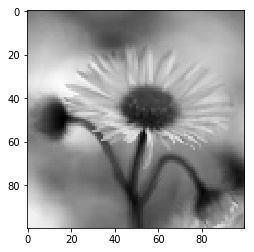

(100, 100, 1)
(1, 100, 100, 1)
(1, 5)
[[nan nan nan nan nan]]
0
[1. 0. 0. 0. 0.]


In [0]:
X_1 = pickle.load(open("X_test_pickle","rb"))
Y1 = pickle.load(open("y_test_pickle","rb"))

plt.imshow(X_1[26,:,:,0],cmap = "gray")
plt.show()
print(X[2].shape)
img2 = np.reshape(X_1[26], [-1,100,100,1] )
print(img2.shape)
prediction = model.predict(img2)

print(np.argmax(prediction))
print(y_test[26])

In [0]:
def find_true_label(i):
   if y_test[i][0] == 1:
      true_label = 0
   else:
      true_label = 1
   return true_label

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


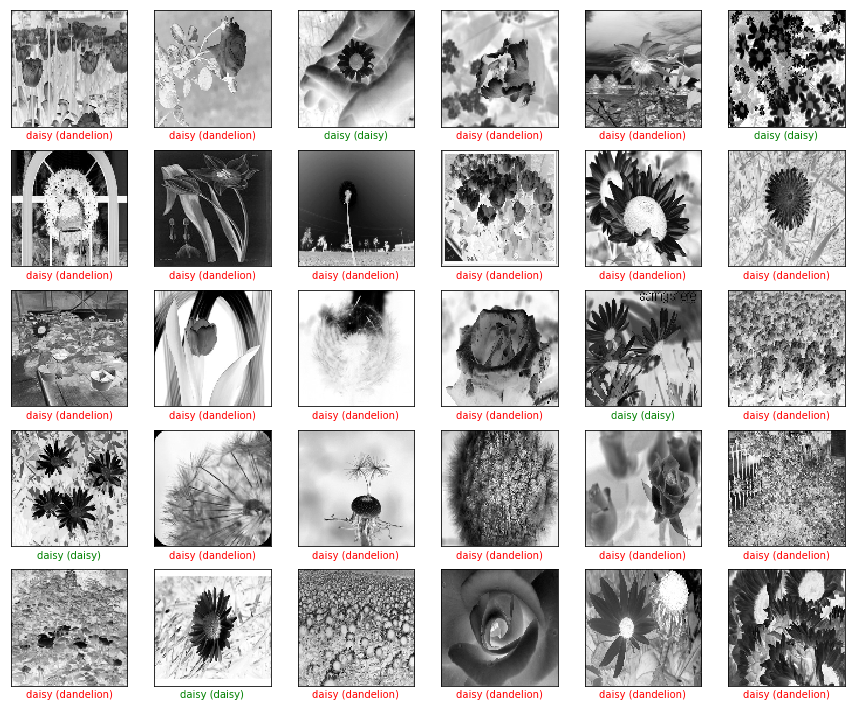

In [0]:
plt.figure(figsize=(15,15))
for i in range(30):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(X_test[i,:,:,0], cmap = plt.cm.binary)
  predicted_label = np.argmax(prediction[i])
  true_label = find_true_label(i)
  if predicted_label == true_label:
    color ='green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(CATEGORIES[predicted_label],CATEGORIES[true_label]),color=color)

In [0]:
img = cv2.imread("Daisies.jpg", cv2.IMREAD_GRAYSCALE)
#img = X_test[20]

In [0]:
img = np.array(img)
img.shape
img = cv2.resize(img,(100,100))
print(img.shape)
img = np.expand_dims(img,0)
print(img.shape)
img = np.reshape(img,[-1,100,100,1])
print(img.shape)
prediction = model.predict(img)
print(prediction.shape)
#for label in prediction
  
print(prediction)
print(np.argmax(prediction))


(100, 100)
(1, 100, 100)
(1, 100, 100, 1)
(1, 5)
[[nan nan nan nan nan]]
0
